In [1]:
import os.path
from os import path
from datetime import datetime
import calendar
import numpy as np
import pandas as pd


data_path = '/kaggle/input/bike-sharing-demand/'
if not path.exists(data_path):
    data_path = './input/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

train['date'] = train['datetime'].apply(lambda x : x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])
train['weekday'] = train['date'].apply(
    lambda dateString:
        calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]
)

train['season'] = train['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, snow, Fog'
})

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


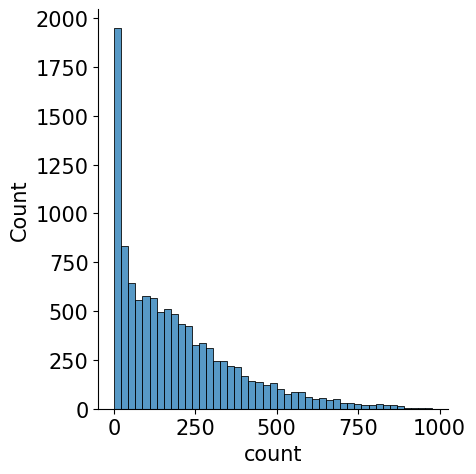

In [2]:
# matplotlib -> python 으로 데이터 시각화시 사용됨
# seaborn -> matplotlib 에 고수준 인터페이스 덧씌운 라이브러리

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
sns.displot(train['count'])

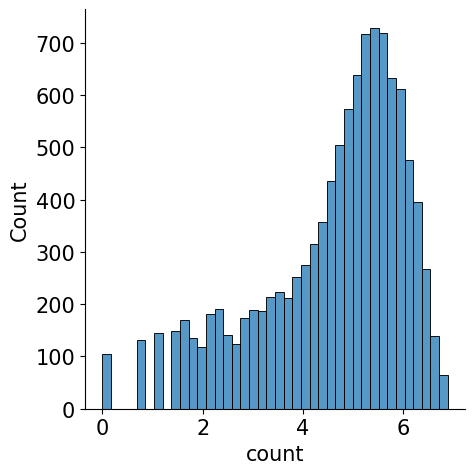

In [3]:
# 회귀모델이 좋은 성능을 낼려면 정규분포를 따라야 하는이유?

sns.displot(np.log(train['count']))

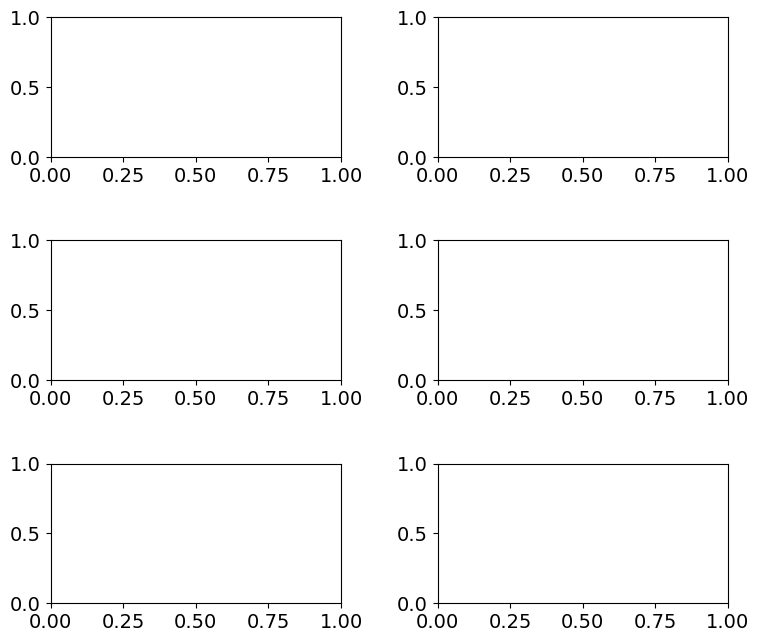

In [4]:
mpl.rc('font', size=14) # 폰트크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(8, 7) # 전체 Figure 크기를 10x9 인치로 설정

In [5]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

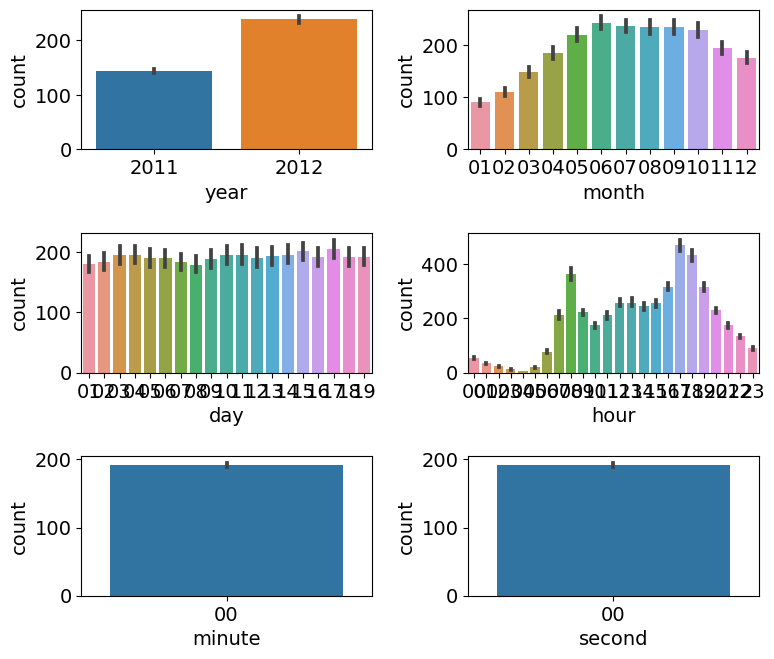

In [6]:
# Figure >> Subplot 

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1]) 

figure

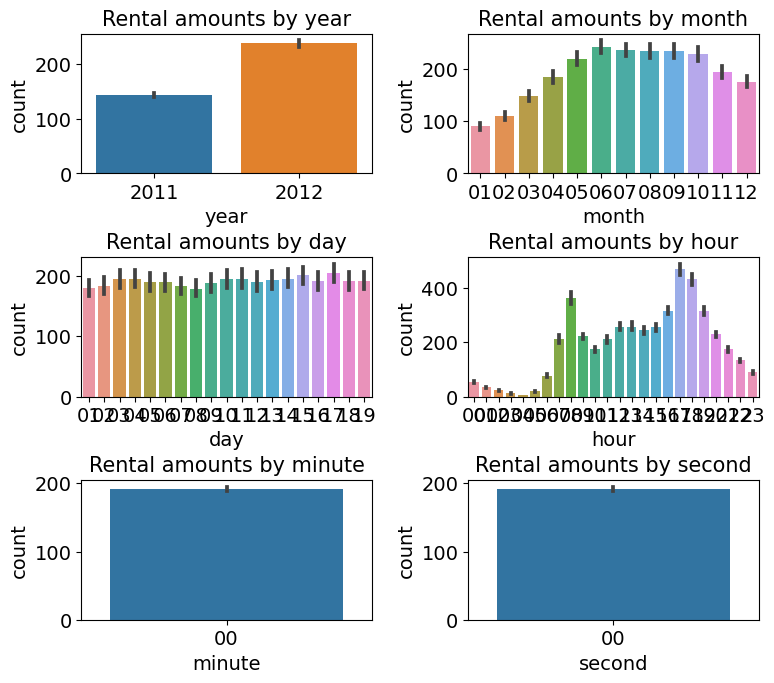

In [7]:
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

figure

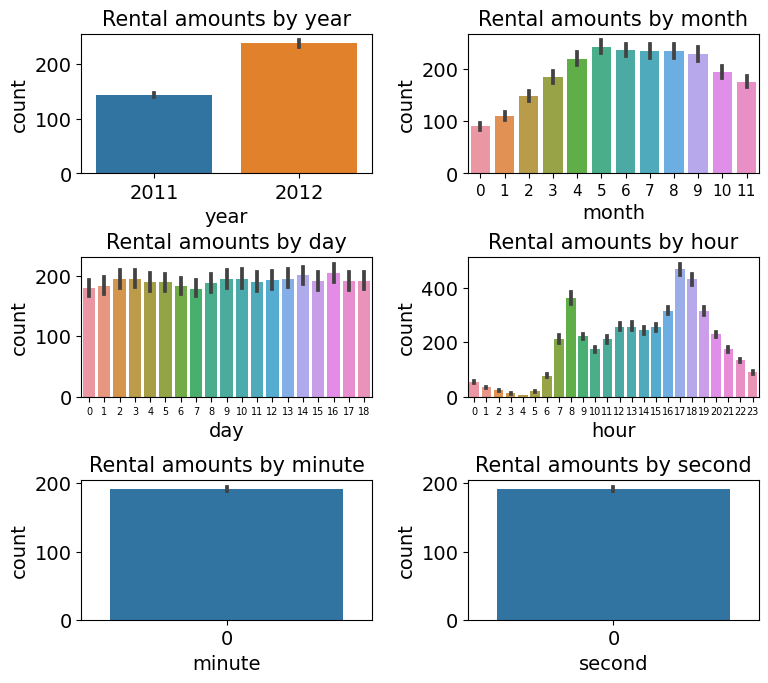

In [8]:
import matplotlib.ticker as ticker

def custom_formatter(x, pos):
    """Custom function to format tick labels"""
    return int(x) if x<10 else x

# Apply custom formatter to x axis of axes[1,0]
axes[1,0].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
axes[0,1].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
axes[1,1].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
axes[2,0].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
axes[2,1].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))



axes[0,1].tick_params(axis='x', labelsize=11)
axes[1,0].tick_params(axis='x', labelsize=7)
axes[1,1].tick_params(axis='x', labelsize=7)
figure

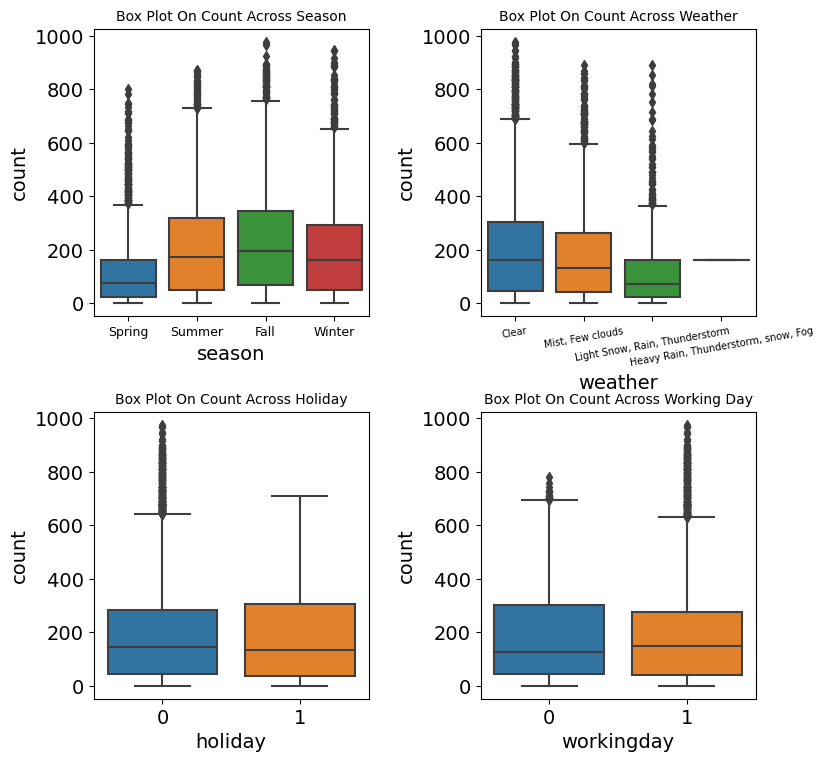

In [9]:
# 시간 데이터 => 막대그래프
# 범주형 데이터에 따른 수치 정보 -> 박스 플롯 

def custom_formatter_2(x, pos):
    """Custom function to format tick labels"""
    print(x)
    if len(x) > 10:
        x = x[:10] + '...'
    return x

figure_2, axes_2 = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure_2.set_size_inches(8, 8)

# 스텝 2: 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯 
sns.boxplot(x='season', y='count', data=train, ax=axes_2[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes_2[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes_2[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes_2[1, 1])


axes_2[0,0].tick_params(axis='x', labelsize=9)
axes_2[0,1].tick_params(axis='x', labelsize=7)
# 스텝 3: 세부설정
# 3-1: 서브플롯에 제목 달기
# axes_2[0, 1].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter_2))

axes_2[0, 0].set_title('Box Plot On Count Across Season', fontsize=10)
axes_2[0, 1].set_title('Box Plot On Count Across Weather', fontsize=10)
axes_2[1, 0].set_title('Box Plot On Count Across Holiday', fontsize=10)
axes_2[1, 1].set_title('Box Plot On Count Across Working Day', fontsize=10)

axes_2[0, 1].tick_params(axis='x', labelrotation=10)

<AxesSubplot:xlabel='hour', ylabel='count'>

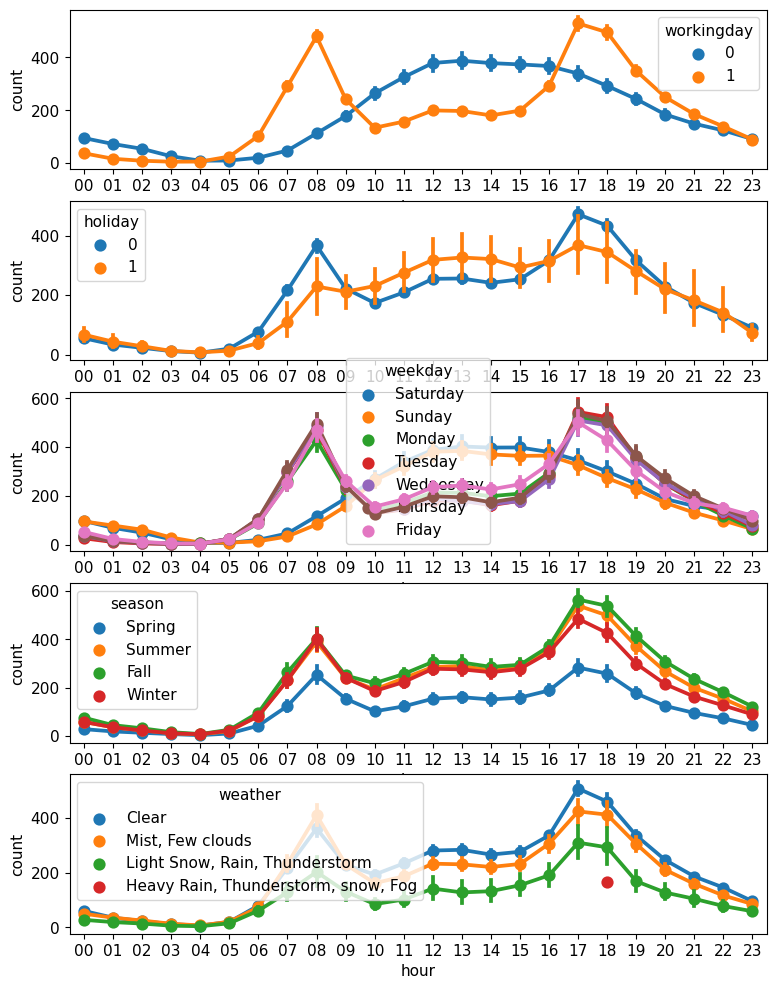

In [10]:
# 포인트 플릇
import matplotlib as mpl


mpl.rc('font', size=11)
figure_3, axes_3 = plt.subplots(nrows=5)
figure_3.set_size_inches(9, 12)

# 스텝 2
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes_3[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes_3[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes_3[2], markersize=1, markerhalign='left')
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes_3[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes_3[4])


<AxesSubplot:xlabel='humidity', ylabel='count'>

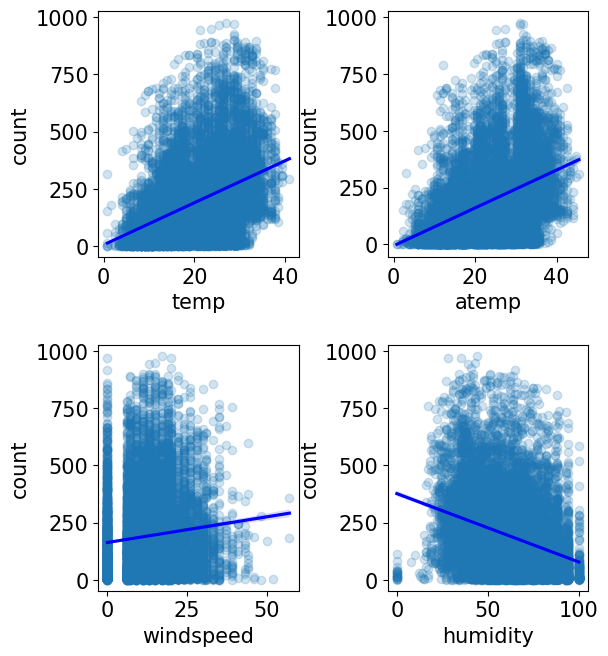

In [11]:
# 회귀선을 포함한 산점도 그래프

mpl.rc('font', size=15)
figure_4, axes_4 = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure_4.set_size_inches(6,7)

# 스텝 2: 서브플롯 할당
# 온도, 체감 온도, 습도 별 대여 수량 산점도 그래프

sns.regplot(x='temp', y='count', data=train, ax=axes_4[0,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

sns.regplot(x='atemp', y='count', data=train, ax=axes_4[0,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

sns.regplot(x='windspeed', y='count', data=train, ax=axes_4[1,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

sns.regplot(x='humidity', y='count', data=train, ax=axes_4[1,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})




[Text(0.5, 1.0, 'HEatmap of Numercial Data')]

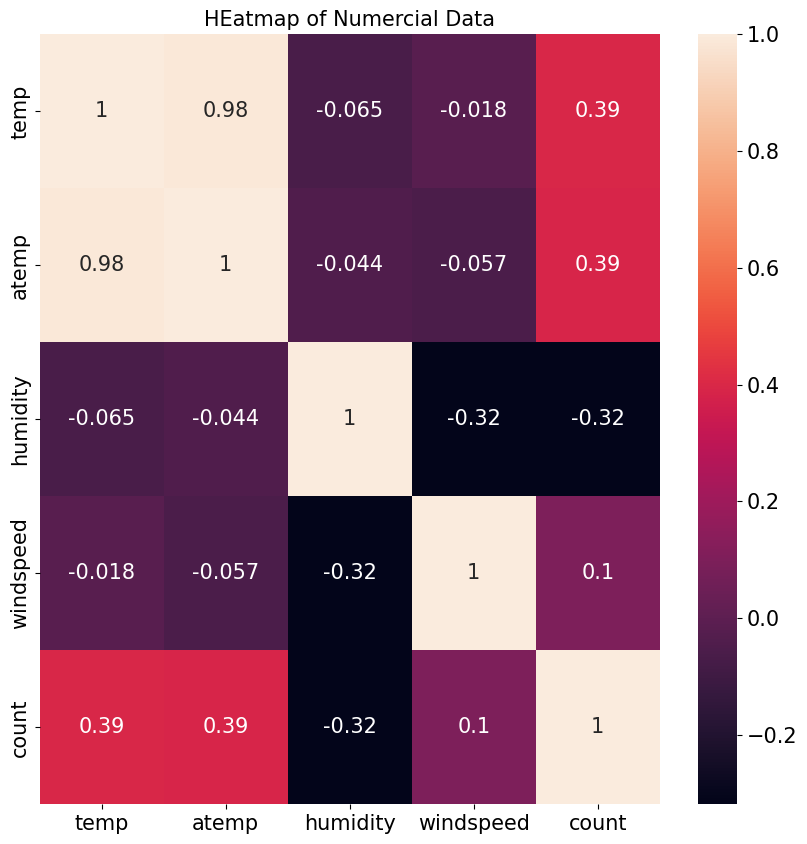

In [12]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)
ax.set(title='HEatmap of Numercial Data')